# Introduction to Neural Networks

## Import packages

In [0]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the data

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [13]:
#printng shape of mnist train and test data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Understanding the image data format

In [14]:
X_train[0].shape

(28, 28)

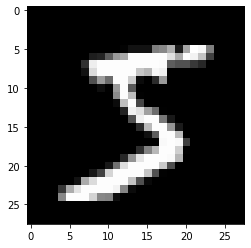

In [15]:
plt.imshow(X_train[0], cmap='gray')

In [16]:
y_train[0]

5

## Preprocessing the image data

In [0]:
image_height, image_width = 28, 28

In [0]:
X_train = X_train.reshape(60000, image_height * image_width)
X_test = X_test.reshape(10000, image_height * image_width)

In [19]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [20]:
print(X_train[0])
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [21]:
X_train /= 255.0
X_test /= 255.0
print(X_train[0])


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [22]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [23]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


## Build a model

In [0]:
model = Sequential()

In [0]:
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

## Compile the model

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [28]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.1854 - accuracy: 0.9437 - val_loss: 0.1035 - val_accuracy: 0.9677
Epoch 2/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.0793 - accuracy: 0.9757 - val_loss: 0.1017 - val_accuracy: 0.9684
Epoch 3/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.0576 - accuracy: 0.9821 - val_loss: 0.0772 - val_accuracy: 0.9756
Epoch 4/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.0440 - accuracy: 0.9861 - val_loss: 0.0685 - val_accuracy: 0.9811
Epoch 5/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.0341 - accuracy: 0.9885 - val_loss: 0.0756 - val_accuracy: 0.9800
Epoch 6/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.0297 - accuracy: 0.9904 - val_loss: 0.0955 - val_accuracy: 0.9771
Epoch 7/20
60000/60000 [==============================] - 5s 91us/s

## What is the accuracy of the model?

### Plot the accuracy of the training model

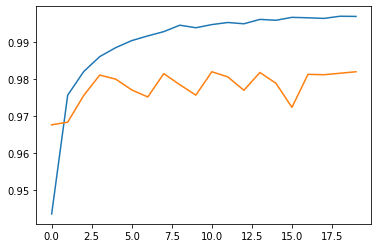

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

### Plot the accuracy of training and validation set

### Accuracy of training and validation with loss

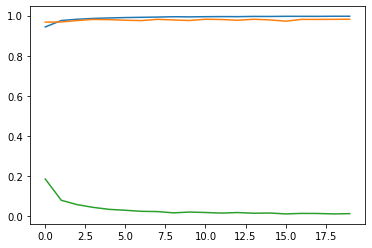

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])

# Evaluting the model

In [31]:
score = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 46us/step


## Run a prediction

In [32]:
score

[0.13539442304080895, 0.9819999933242798]

## Experiment further
- What results do you get with a model with more than 2 hidden layers and more/less neurons
- What results do you get when trying to use another activation function?

# Convolution Neural Network

## Import the libraries

In [0]:
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

## Load the data

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [35]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Pre-processing

In [0]:
batch_size = 128
num_classes = 10
#epochs = 3

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0


y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test, num_classes)



In [37]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


## Use the model

In [38]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(5,5),input_shape=(28,28,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(64, kernel_size=(5,5),padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(1024,activation='relu'))
cnn.add(Dense(10,activation='softmax'))

cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(cnn.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              3212288   
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [39]:
history_cnn = cnn.fit(X_train,y_train,epochs=20,verbose=1,validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 227us/step - loss: 0.0962 - accuracy: 0.9700 - val_loss: 0.0569 - val_accuracy: 0.9822
Epoch 2/20
60000/60000 [==============================] - 9s 151us/step - loss: 0.0365 - accuracy: 0.9889 - val_loss: 0.0275 - val_accuracy: 0.9913
Epoch 3/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.0245 - accuracy: 0.9925 - val_loss: 0.0218 - val_accuracy: 0.9924
Epoch 4/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.0171 - accuracy: 0.9948 - val_loss: 0.0276 - val_accuracy: 0.9911
Epoch 5/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.0134 - accuracy: 0.9955 - val_loss: 0.0399 - val_accuracy: 0.9904
Epoch 6/20
60000/60000 [==============================] - 9s 151us/step - loss: 0.0103 - accuracy: 0.9968 - val_loss: 0.0372 - val_accuracy: 0.9893
Epoch 7/20
60000/60000 [==============================] - 9s 

In [0]:
cnn.load_weights('weights/cnn-model5.h5')

Recall that when using neural networks we got good accuracy.

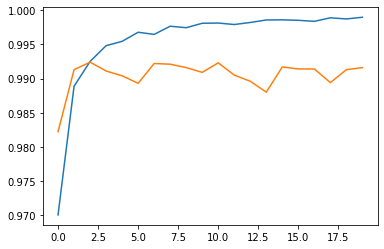

In [42]:
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])

Comparing this to using CNNs - the performance is far superior.

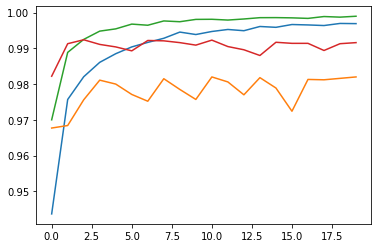

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])

In [44]:
score = cnn.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 63us/step


In [45]:
score

[0.06329701434738243, 0.991599977016449]

## Not related just testing out files

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('data/olympics.csv',skiprows=4)
df.head()